# Neuropixels Recordings from Hippocampus of Head-Fixed Mice During Odor Presentation

**Dandiset ID:** 001335

**Generated by AI with dandi-notebook-gen. Please verify contents carefully.**

---

This exploratory notebook provides an overview and initial analyses for the Dandiset "Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation".

**Description:**  
Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.

**Data contributors:** Manish Mohapatra, Yaroslav Halchenko  
**License:** CC-BY-4.0  
**Citation:** Mohapatra & Halchenko (2025), _Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation_ (Version draft). DANDI Archive.

---
This notebook downloads remote NWB data, visualizes a snippet of Local Field Potential (LFP) recordings, and explores basic temporal experiment structure including blocks and odor stimuli.  
It is intended as a starting point; careful review and adaptation recommended!

## Setup and list Dandiset assets

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Number of files in Dandiset: {len(assets)}")
for asset in assets:
    print(f"Asset path: {asset.path} | Size: {asset.size / 1e6:.2f} MB")

Number of files in Dandiset: 1
Asset path: sub-M541/sub-M541_ecephys.nwb | Size: 1374.26 MB


## Select NWB file URL and load with remfile, h5py, PyNWB

In [2]:
import remfile
import h5py
import pynwb

nwb_url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"

file = remfile.File(nwb_url)
f = h5py.File(file, 'r')
io = pynwb.NWBHDF5IO(file=f)
nwbfile = io.read()

# Basic metadata
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id}, Species: {nwbfile.subject.species}, Sex: {nwbfile.subject.sex}")

Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Session start time: 2025-02-14 10:53:25.647928-05:00
Subject ID: M541, Species: Mus musculus, Sex: M


## Explore session intervals and odor stimuli

This dataset has three experimental blocks (each ~22-25 minutes) and six odors with ~101 trials each, lasting about 2 seconds.

In [3]:
for interval_name in nwbfile.intervals:
    interval_table = nwbfile.intervals[interval_name]
    n_intervals = len(interval_table.id)
    print(f"{interval_name:12s}: {n_intervals} intervals")

Block 1     : 1 intervals
Block 2     : 1 intervals
Block 3     : 1 intervals
Odor A ON   : 101 intervals
Odor B ON   : 101 intervals
Odor C ON   : 101 intervals
Odor D ON   : 101 intervals
Odor E ON   : 101 intervals
Odor F ON   : 101 intervals


## Plot sample LFP snippets for first few channels

The full LFP data contains ~15 million samples at 2500Hz over 64 channels.  
Here we visualize a short, ~2s segment from first 4 channels.

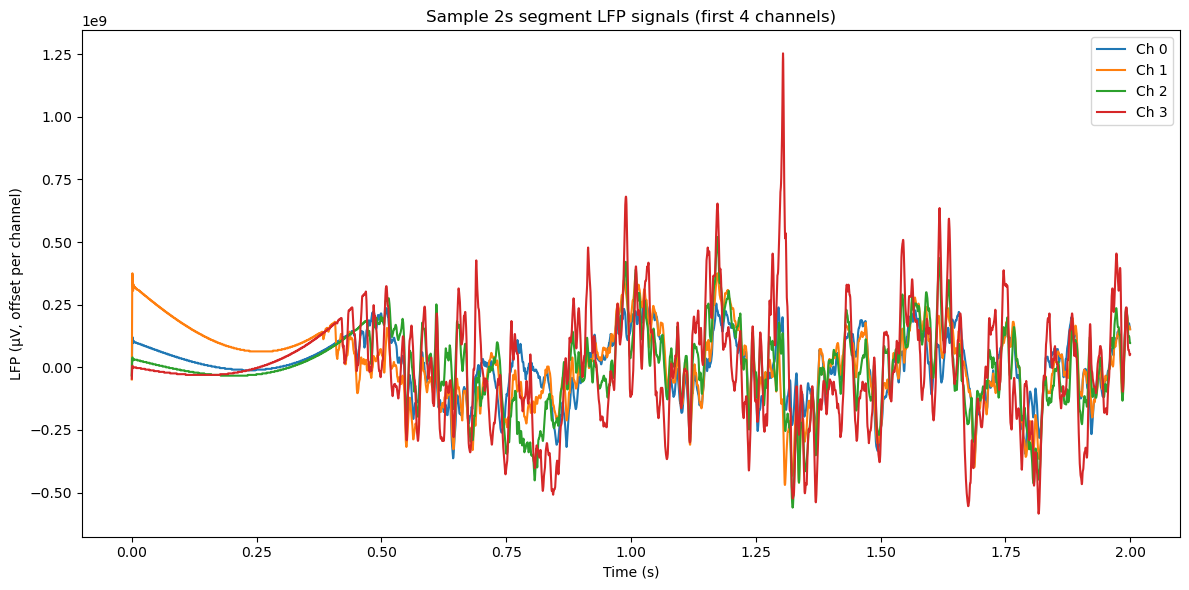

In [4]:
import matplotlib.pyplot as plt
import numpy as np

lfp = nwbfile.processing["ecephys"].data_interfaces["LFP"]
num_samples = 5000  # ~2 seconds
num_channels = min(4, lfp.data.shape[1])

snippet = lfp.data[:num_samples, :num_channels]
times = np.arange(num_samples) / lfp.rate

plt.figure(figsize=(12, 6))
for i in range(num_channels):
    plt.plot(times, snippet[:, i] * 1e6 + i * 300, label=f"Ch {i}")
plt.xlabel("Time (s)")
plt.ylabel("LFP (μV, offset per channel)")
plt.title("Sample 2s segment LFP signals (first 4 channels)")
plt.legend()
plt.tight_layout()
plt.show()

## Next Steps

- Extract and analyze additional electrophysiological features, such as power spectra or event-triggered averages.
- Align LFP or spike data to odor cues using the provided intervals
- Integrate behavioral annotations if/when available.
- Carefully validate any findings or patterns before interpretation.

---

_This notebook was AI-generated and has not been fully verified. Please interpret results with caution._

---

In [5]:
io.close()